In [250]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, binary_erosion, disk, rectangle, binary_dilation
from skimage.filters import threshold_otsu, rank
from skimage.transform import rescale
from skimage.color import label2rgb
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
import matplotlib.patches as mpatches
from skimage import data

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

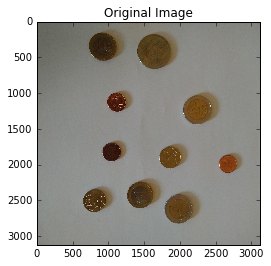

In [251]:
#Reading and displaying Coins and then converting ubyte and rescaling it
coins = imread('./images/coins.jpg')
coins = img_as_ubyte(coins)
plt.figure
plt.imshow(coins)
plt.title('Original Image')
plt.show()
coins = rescale(coins, 1/4)

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

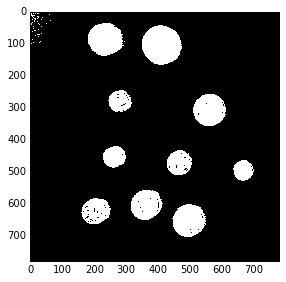

In [252]:
#Converting Coins to gray and then using Otsu threshilding, binarizing the image and displaying it.
gray_coins = rgb2gray(coins)
plt.figure()
otsu_thresh = threshold_otsu(gray_coins)
binary_coins = otsu_thresh >= gray_coins
imshow(binary_coins)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

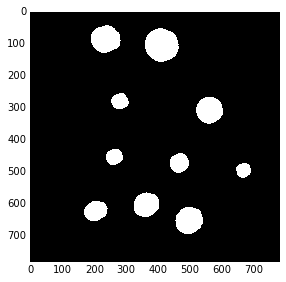

In [253]:
#Cleaning up the image using morphological operations and eroding the image
selem = disk(3)
closed = binary_closing(binary_coins, selem)
opened = binary_opening(closed, selem)
selem = disk(9)
coins_eroded = binary_erosion(opened, selem)
imshow(coins_eroded)

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


Radius of Coin1 is 44
Radius of Coin2 is 53
Radius of Coin3 is 26
Radius of Coin4 is 42
Radius of Coin5 is 26
Radius of Coin6 is 30
Radius of Coin7 is 23
Radius of Coin8 is 39
Radius of Coin9 is 34
Radius of Coin10 is 43


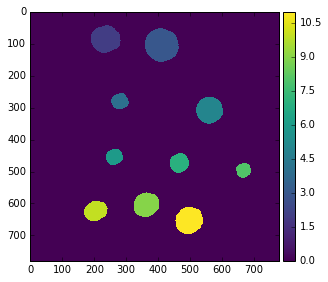

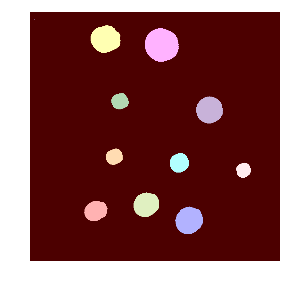

The total number of coins in the image is : 10


In [254]:
#using label to only get the binarized part of the image and setting the background to false and displaying it
label_image = label(coins_eroded, background=False)
imshow(label_image)
image_label_overlay = label2rgb(label_image, image=coins_eroded)
fig, ax = plt.subplots()
ax.imshow(image_label_overlay)

#using regionprops to detect areas of the labelled image
i=1;
for region in regionprops(label_image):
    if region.area >= 600: #area greater than 600 is considered as an image
        radius = region.equivalent_diameter / 2 #radius of the image is calculated by finding region diameter 
        radius=round(radius) #radius rounded to give integer output
        print('Radius of Coin'+str(i)+' is ' + str(radius)) #radius is then printed
        i=i+1

ax.set_axis_off()
plt.tight_layout()
plt.show()
print('The total number of coins in the image is : ' + str(i-1)) #finally total number of coin is displayed 


## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

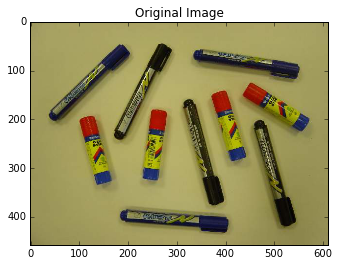

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


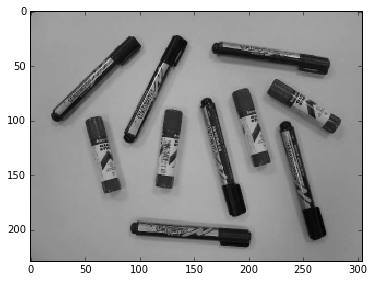

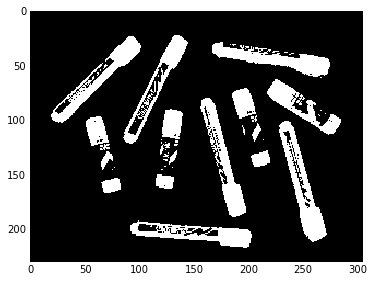

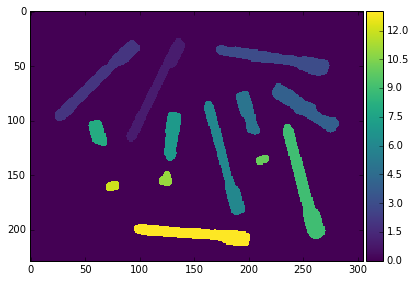

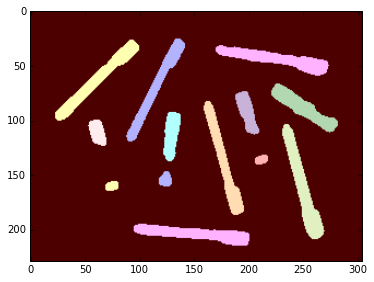

Number of Markers is 6
Number of Glues is 4


In [255]:
#Reading Image and then displaying original image 
objects = imread('./images/objets4.jpg')
plt.figure
plt.imshow(objects)
plt.title('Original Image')
plt.show()


#converting image to ubyte and then rescaling and converting to gray and showing the image again
objects = img_as_ubyte(objects)
objects = rescale(objects, 1/2)
objects = rgb2gray(objects)
plt.figure()
imshow(objects)

#performing otsu thresholding and showing the binary image
otsu_thresh = threshold_otsu(objects)
binary_objects = otsu_thresh >= objects
plt.figure()
imshow(binary_objects)

#cleaning the image with morphological operations and obtaining the image after erosion 
selem = disk(5)
closed = binary_closing(binary_objects, selem)
opened = binary_opening(closed, selem)
selem = disk(2.5)
objects_eroded = binary_erosion(opened, selem)
plt.figure()
imshow(objects_eroded)

#using label to only get the binarized part of the image and setting the background to false and displaying it
label_image = label(objects_eroded, background=False)
imshow(label_image)
image_label_overlay = label2rgb(label_image, image=objects_eroded)
fig, ax = plt.subplots()
ax.imshow(image_label_overlay)

#using regionprops to detect areas of the labelled image
i =0; j=0
for region in regionprops(label_image):
    if region.area >= 900: #For images with area greater than 900, it is considered as the marker
        i=i+1
        
for region in regionprops(label_image): #for images with area between 150 and 900 is considered as glue
    if region.area >= 150 and region.area<=900:
        j=j+1
        
plt.tight_layout()
plt.show()
print('Number of Markers is ' + str(i))
print('Number of Glues is ' + str(j))

